#Modelo para pesquisa por CID (CID10) por Ano por Município e também modelo para correção das datas nos atestados de óbito do SIM.
Estatística de Óbitos por CID (X95) em Foz do Iguaçu em 2023

In [ ]:
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade
# ⚠️ Após executar esta célula, reinicie a sessão do Google Colab dessa forma (Usando a interface do Google Colab):
# Em português: Vá em 'Tempo de execução' > 'Reiniciar sessão'
# Em inglês: Vá em 'Runtime' > 'Restart session'

  Cloning https://github.com/AlertaDengue/PySUS.git to /tmp/pip-req-build-zmr5vjwu
  Running command git clone --filter=blob:none --quiet https://github.com/AlertaDengue/PySUS.git /tmp/pip-req-build-zmr5vjwu
  Resolved https://github.com/AlertaDengue/PySUS.git to commit 54f7800db4da5171d55e3446d638d64beeb8b149
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 k

In [ ]:
# ⚠️ Após executar a célula acima, reinicie a sessão do Google Colab:
# Em português: Vá em 'Tempo de execução' > 'Reiniciar sessão'
# Em inglês: Vá em 'Runtime' > 'Restart session'
import pandas as pd
import matplotlib.pyplot as plt
from pysus.online_data.SIM import download

In [ ]:
# Baixar dados de óbitos (grupo CID10) do Paraná em 2023
df = download(states=["PR"], years=[2023], groups=["CID10"]).to_dataframe()
df.head()




7368805it [00:00, 8027794360.19it/s] 


,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,19052023,0558,841,411330,17071949,473,1,1,...,,,,,,,,,,539847
1,1,2,19052023,1253,843,430610,24071947,475,1,1,...,,,,,,,,,,539857
2,1,2,19052023,0500,841,411870,18071938,484,2,1,...,,,,,,,,,,539872
3,1,2,19052023,1355,800,,24041973,450,1,4,...,,,,,,,,,,539909
4,1,2,19052023,0855,841,410690,10031972,451,1,4,...,,,,,,,,,,539955


In [ ]:
# Garantir que a coluna esteja no formato certo (int)
df['CODMUNOCOR'] = df['CODMUNOCOR'].fillna(0).astype(int)

# Filtrar Foz do Iguaçu e CID10 X95
df_foz = df[(df['CODMUNOCOR'] == 410830) & (df['CAUSABAS'].str.startswith('X95'))]

print(f"Total de óbitos X95 ocorridos em Foz do Iguaçu: {len(df_foz)}")
df_foz.head()

Total de óbitos X95 ocorridos em Foz do Iguaçu: 72


,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
485,1,2,20052023,1745,841,410830,24052001,421,1,1,...,,,,,,,,,,547742
992,1,2,22052023,0400,841,411560,18031975,448,1,4,...,,,,,,,,,,556335
2482,1,2,28052023,2315,841,410830,30072004,418,1,1,...,,,,,,,,,,581717
3185,1,2,31052023,0030,841,410830,10032003,420,1,1,...,,,,,,,,,,594417
4944,1,2,07062023,0030,841,410830,05112004,418,1,1,...,,,,,,,,,,624166


In [ ]:
# Filtrar registros onde a causa básica (CAUSABAS) começa com X95
#df_filtrado = df[df['CAUSABAS'].str.startswith(('X95'))]
df_filtrado = df_foz
# Mostrar algumas linhas filtradas
df_filtrado.head()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
485,1,2,20052023,1745,841,410830,24052001,421,1,1,...,,,,,,,,,,547742
992,1,2,22052023,0400,841,411560,18031975,448,1,4,...,,,,,,,,,,556335
2482,1,2,28052023,2315,841,410830,30072004,418,1,1,...,,,,,,,,,,581717
3185,1,2,31052023,0030,841,410830,10032003,420,1,1,...,,,,,,,,,,594417
4944,1,2,07062023,0030,841,410830,05112004,418,1,1,...,,,,,,,,,,624166


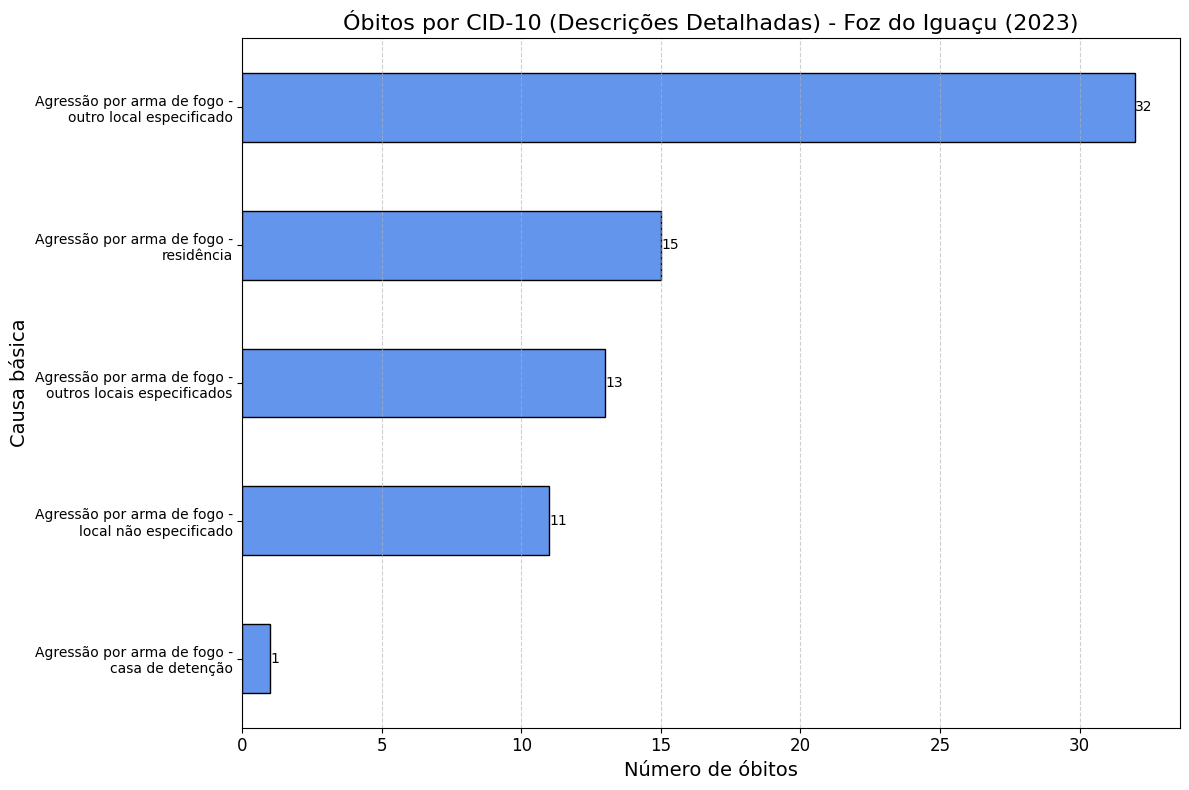

In [ ]:
import matplotlib.pyplot as plt
import textwrap

# Dicionário de mapeamento manual dos principais CIDs X95_
cid_descricao = {
    'X950': 'Agressão por arma de fogo - residência',
    'X951': 'Agressão por arma de fogo - rua ou estrada',
    'X952': 'Agressão por arma de fogo - comércio ou serviço',
    'X953': 'Agressão por arma de fogo - escola ou instituição pública',
    'X954': 'Agressão por arma de fogo - outro local especificado',
    'X955': 'Agressão por arma de fogo - casa de detenção',
    'X956': 'Agressão por arma de fogo - outro local institucional',
    'X957': 'Agressão por arma de fogo - área industrial/construção',
    'X958': 'Agressão por arma de fogo - outros locais especificados',
    'X959': 'Agressão por arma de fogo - local não especificado',

    # Se tiver S02 também filtrado, exemplo:
    'S020': 'Fratura de calota craniana',
    'S021': 'Fratura de base do crânio',
    'S022': 'Fratura de ossos da face',
    # (adicionar conforme necessário...)
}

# Contagem dos casos encontrados
contagem_cids = df_filtrado['CAUSABAS'].value_counts()

# Substituir os códigos pelos nomes das doenças
contagem_cids.index = contagem_cids.index.map(lambda cid: cid_descricao.get(cid, cid))


# Tamanho da figura ajustado
plt.figure(figsize=(12, 8))

# Quebra de linhas nos rótulos
def wrap_labels(labels, width=30):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Aplicar quebra
contagem_cids.index = wrap_labels(contagem_cids.index)

# Plotar gráfico de barras horizontais
bars = contagem_cids.sort_values().plot(kind='barh', color='cornflowerblue', edgecolor='black')

# Título e eixos
plt.title('Óbitos por CID-10 (Descrições Detalhadas) - Foz do Iguaçu (2023)', fontsize=16)
plt.xlabel('Número de óbitos', fontsize=14)
plt.ylabel('Causa básica', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

# Adicionar valores ao lado das barras
for p in bars.patches:
    plt.annotate(
        str(int(p.get_width())),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center', fontsize=10
    )

# Grid mais leve
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-36-e4737c2830d8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['SEXO_DESC'] = df_filtrado['SEXO'].map(mapa_sexo)


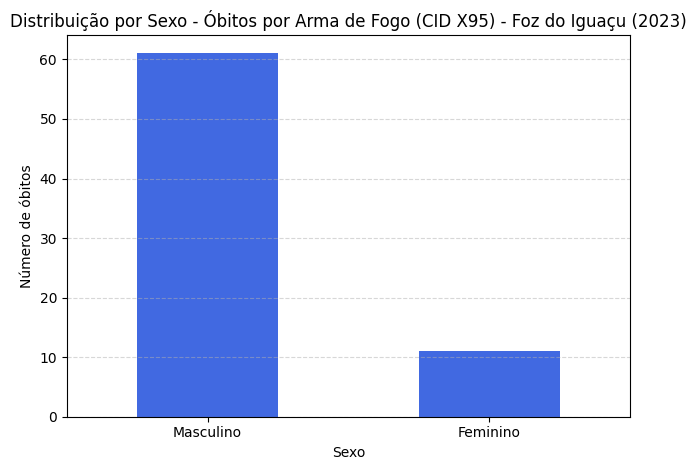

In [ ]:
# Criar dicionário de mapeamento
mapa_sexo = {
    0: 'Ignorado',
    1: 'Masculino',
    2: 'Feminino'
}

# Aplicar o mapeamento em uma nova coluna
df_filtrado['SEXO_DESC'] = df_filtrado['SEXO'].map(mapa_sexo)

import matplotlib.pyplot as plt

# Plotar distribuição de sexo
df_filtrado['SEXO_DESC'].value_counts().plot(kind='bar', color='royalblue')
plt.title('Distribuição por Sexo - Óbitos por Arma de Fogo (CID X95) - Foz do Iguaçu (2023)')
plt.xlabel('Sexo')
plt.ylabel('Número de óbitos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


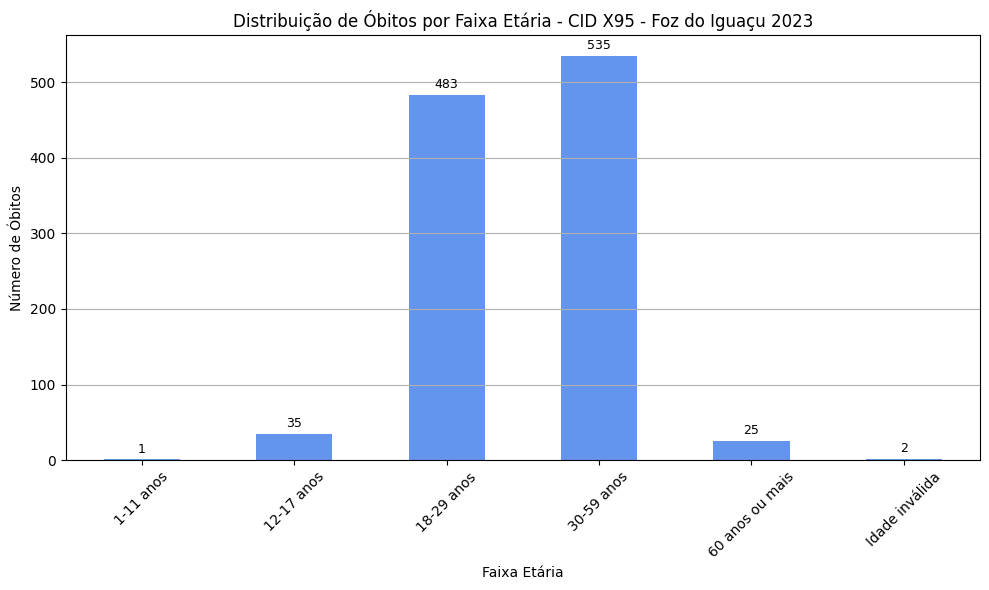

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtrar apenas CID X95
#df_x95 = df[df['CAUSABAS'].str.startswith('X95', na=False)].copy()
df_x5=df_foz

# 2. Função segura para calcular idade real via datas
def calcular_idade_datas(dtnasc, dtobito):
    try:
        dtnasc = str(dtnasc).zfill(8)
        dtobito = str(dtobito).zfill(8)

        ano_nasc = int(dtnasc[4:8])
        mes_nasc = int(dtnasc[2:4])
        dia_nasc = int(dtnasc[0:2])

        ano_obito = int(dtobito[4:8])
        mes_obito = int(dtobito[2:4])
        dia_obito = int(dtobito[0:2])

        idade = ano_obito - ano_nasc

        # Ajustar caso não tenha feito aniversário ainda
        if (mes_obito, dia_obito) < (mes_nasc, dia_nasc):
            idade -= 1

        return idade

    except:
        return None

# 3. Aplicar o cálculo da idade
df_x95['IdadeCalculada'] = df_x95.apply(lambda row: calcular_idade_datas(row['DTNASC'], row['DTOBITO']), axis=1)

# 4. Atualizar idade final segura
df_x95['IDADE_FINAL'] = df_x95['IdadeCalculada']  # Agora usamos só a idade calculada pelas datas!

# 5. Função para classificar faixas etárias
def classificar_faixa_etaria(idade):
    if pd.isna(idade):
        return 'Ignorado'
    elif idade < 1:
        return 'Menos de 1 ano'
    elif idade < 12:
        return '1-11 anos'
    elif idade < 18:
        return '12-17 anos'
    elif idade < 30:
        return '18-29 anos'
    elif idade < 60:
        return '30-59 anos'
    elif idade <= 120:
        return '60 anos ou mais'
    else:
        return 'Idade inválida'

# 6. Aplicar a classificação de faixa etária
df_x95['FaixaEtariaAtualizada'] = df_x95['IDADE_FINAL'].apply(classificar_faixa_etaria)

# 7. Contar e preparar para o gráfico
faixas = df_x95['FaixaEtariaAtualizada'].value_counts().sort_index()

# 8. Plotar o gráfico
plt.figure(figsize=(10,6))
bars = faixas.plot(kind='bar', color='cornflowerblue')
plt.title('Distribuição de Óbitos por Faixa Etária - CID X95 - Foz do Iguaçu 2023')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.grid(axis='y')

# 9. Adicionar rótulos nas barras
for i, v in enumerate(faixas):
    plt.text(i, v + 5, str(int(v)), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
media_corrigida = df_x95['IDADE_FINAL'].mean()
mediana_corrigida = df_x95['IDADE_FINAL'].median()

print(f"Média da idade corrigida (X95): {media_corrigida:.2f} anos")
print(f"Mediana da idade corrigida (X95): {mediana_corrigida:.2f} anos")


Média da idade corrigida (X95): 32.85 anos
Mediana da idade corrigida (X95): 33.00 anos


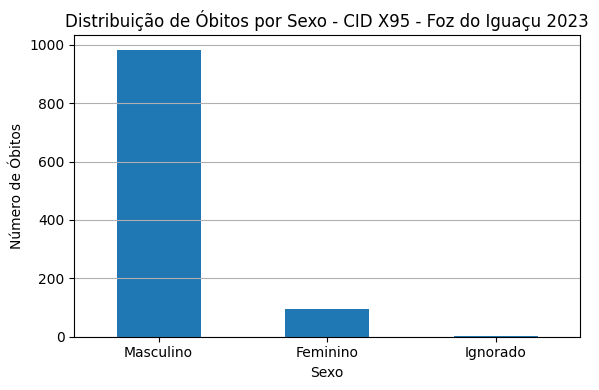

In [ ]:
sexo_map = {1: 'Masculino', 2: 'Feminino'}
df_x95['SexoDescrito'] = df_x95['SEXO'].map(sexo_map).fillna('Ignorado')

sexo_contagem = df_x95['SexoDescrito'].value_counts()

plt.figure(figsize=(6,4))
sexo_contagem.plot(kind='bar')
plt.title('Distribuição de Óbitos por Sexo - CID X95 - Foz do Iguaçu 2023')
plt.xlabel('Sexo')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-66-b96e1e4ab145>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x95['IdadeCalculada'] = df_x95.apply(lambda row: calcular_idade_datas(row['DTNASC'], row['DTOBITO']), axis=1)
<ipython-input-66-b96e1e4ab145>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x95['IDADE_FINAL'] = df_x95['IdadeCalculada']


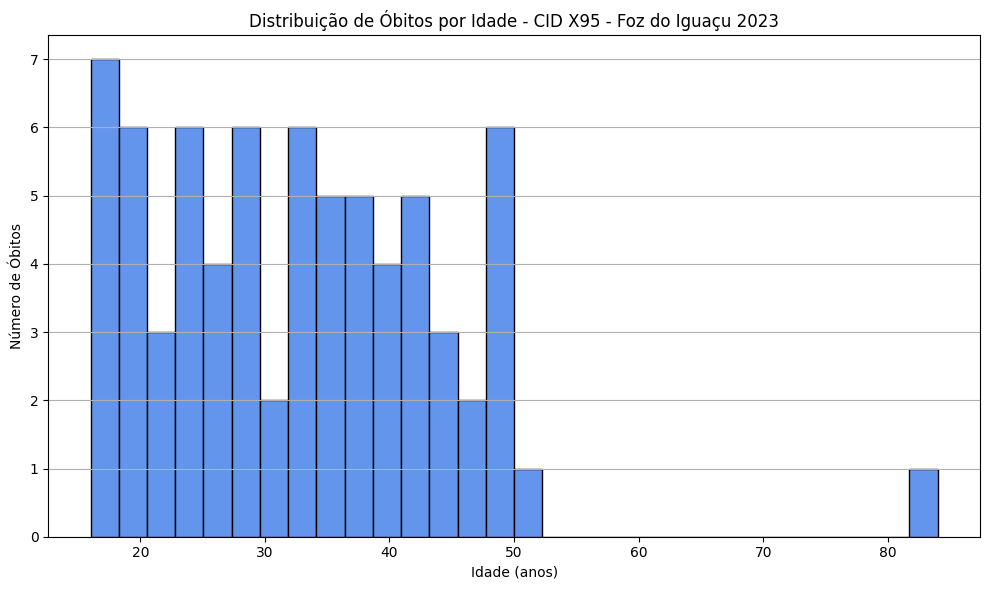

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filtrar apenas CID X95
#df_x95 = df[df['CAUSABAS'].str.startswith('X95', na=False)].copy()
df_x95 = df_foz

# 2. Função segura para calcular idade real via datas
def calcular_idade_datas(dtnasc, dtobito):
    try:
        dtnasc = str(dtnasc).zfill(8)
        dtobito = str(dtobito).zfill(8)

        ano_nasc = int(dtnasc[4:8])
        mes_nasc = int(dtnasc[2:4])
        dia_nasc = int(dtnasc[0:2])

        ano_obito = int(dtobito[4:8])
        mes_obito = int(dtobito[2:4])
        dia_obito = int(dtobito[0:2])

        idade = ano_obito - ano_nasc

        # Ajustar caso não tenha feito aniversário ainda
        if (mes_obito, dia_obito) < (mes_nasc, dia_nasc):
            idade -= 1

        return idade

    except:
        return None

# 3. Aplicar o cálculo da idade
df_x95['IdadeCalculada'] = df_x95.apply(lambda row: calcular_idade_datas(row['DTNASC'], row['DTOBITO']), axis=1)

# 4. Atualizar idade final segura
df_x95['IDADE_FINAL'] = df_x95['IdadeCalculada']

# 5. Filtrar idades plausíveis (0 a 120 anos)
df_idade_valida = df_x95[(df_x95['IDADE_FINAL'] >= 0) & (df_x95['IDADE_FINAL'] <= 120)]

# 6. Agora fazer o histograma de idades reais
plt.figure(figsize=(10,6))
df_idade_valida['IDADE_FINAL'].dropna().plot(kind='hist', bins=30, edgecolor='black', color='cornflowerblue')
plt.title('Distribuição de Óbitos por Idade - CID X95 - Foz do Iguaçu 2023')
plt.xlabel('Idade (anos)')
plt.ylabel('Número de Óbitos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



<ipython-input-65-abf9d8227f4a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x95['DataObito'] = pd.to_datetime(df_x95['DTOBITO'], format='%d%m%Y', errors='coerce')
<ipython-input-65-abf9d8227f4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x95['MesObito'] = df_x95['DataObito'].dt.month


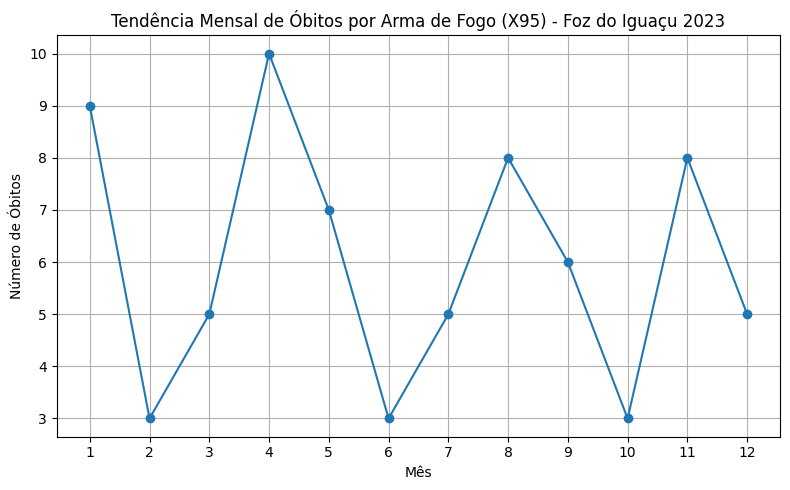

In [ ]:
# 5. 📅 Tendência de óbitos por mês de ocorrência

# Converter DTOBITO para data real
df_x95['DataObito'] = pd.to_datetime(df_x95['DTOBITO'], format='%d%m%Y', errors='coerce')

# Criar coluna com mês do óbito
df_x95['MesObito'] = df_x95['DataObito'].dt.month

# Contar quantos óbitos por mês
obitos_por_mes = df_x95['MesObito'].value_counts().sort_index()

# Plotar tendência mensal
plt.figure(figsize=(8,5))
obitos_por_mes.plot(kind='line', marker='o')
plt.title('Tendência Mensal de Óbitos por Arma de Fogo (X95) - Foz do Iguaçu 2023')
plt.xlabel('Mês')
plt.ylabel('Número de Óbitos')
plt.xticks(range(1,13))
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-64-a1c6226a27e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x95['LOCOCOR'] = pd.to_numeric(df_x95['LOCOCOR'], errors='coerce')
<ipython-input-64-a1c6226a27e2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x95['LOCOCOR_DESC'] = df_x95['LOCOCOR'].map(lococor_map)


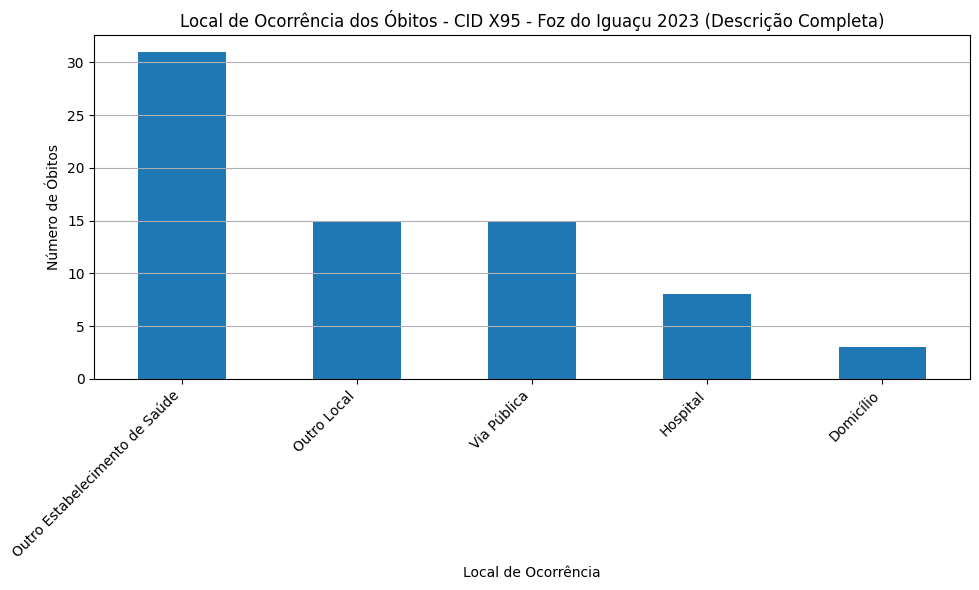

In [ ]:
# Converter LOCOCOR para número (evitar problemas de tipo texto)
df_x95['LOCOCOR'] = pd.to_numeric(df_x95['LOCOCOR'], errors='coerce')

# Dicionário de mapeamento seguro
lococor_map = {
    1: 'Hospital',
    2: 'Domicílio',
    3: 'Via Pública',
    4: 'Outro Estabelecimento de Saúde',
    5: 'Outro Local',
    6: 'Ignorado',
    9: 'Desconhecido'
}

# Mapear apenas onde o valor for conhecido
df_x95['LOCOCOR_DESC'] = df_x95['LOCOCOR'].map(lococor_map)

# Agora eliminar NaNs resultantes de códigos fora da tabela
locais_descritos = df_x95['LOCOCOR_DESC'].value_counts()

# Gráfico
plt.figure(figsize=(10,6))
locais_descritos.plot(kind='bar')
plt.title('Local de Ocorrência dos Óbitos - CID X95 - Foz do Iguaçu 2023 (Descrição Completa)')
plt.xlabel('Local de Ocorrência')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



<ipython-input-63-c8ec34bcf348>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x95['ESC2010'] = pd.to_numeric(df_x95['ESC2010'], errors='coerce')
<ipython-input-63-c8ec34bcf348>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x95['ESCOLARIDADE_DESC'] = df_x95['ESC2010'].map(escolaridade_map)


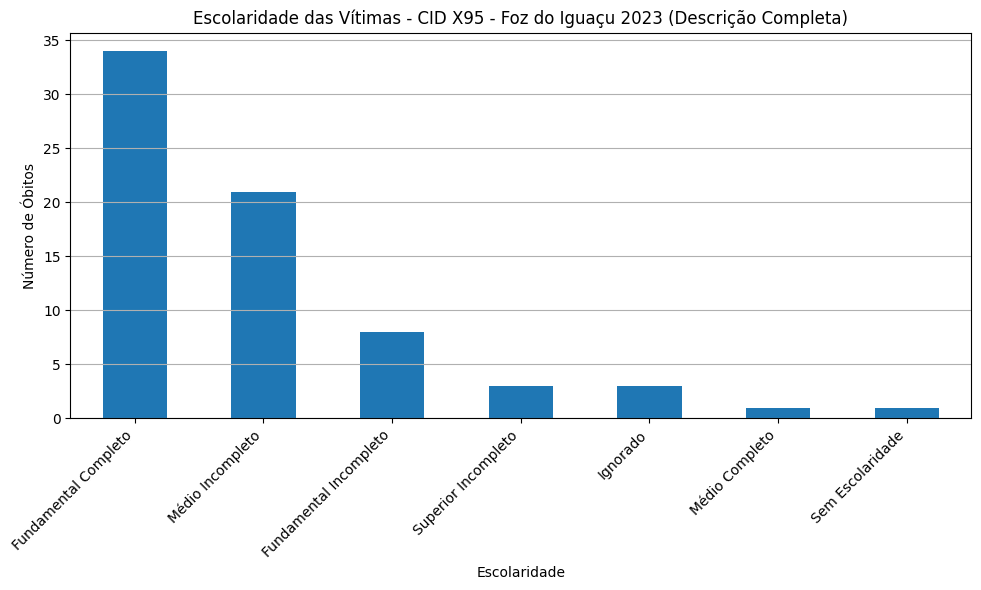

In [ ]:
# 7. 🎓 Escolaridade das vítimas (com mapeamento)

# Primeiro, garantir que ESC2010 é numérico
df_x95['ESC2010'] = pd.to_numeric(df_x95['ESC2010'], errors='coerce')

# Dicionário de mapeamento de escolaridade 2010
escolaridade_map = {
    0: 'Sem Escolaridade',
    1: 'Fundamental Incompleto',
    2: 'Fundamental Completo',
    3: 'Médio Incompleto',
    4: 'Médio Completo',
    5: 'Superior Incompleto',
    6: 'Superior Completo',
    9: 'Ignorado'
}

# Mapear para descrições
df_x95['ESCOLARIDADE_DESC'] = df_x95['ESC2010'].map(escolaridade_map)

# Contagem
escolaridade_descrita = df_x95['ESCOLARIDADE_DESC'].value_counts()

# Plotar
plt.figure(figsize=(10,6))
escolaridade_descrita.plot(kind='bar')
plt.title('Escolaridade das Vítimas - CID X95 - Foz do Iguaçu 2023 (Descrição Completa)')
plt.xlabel('Escolaridade')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


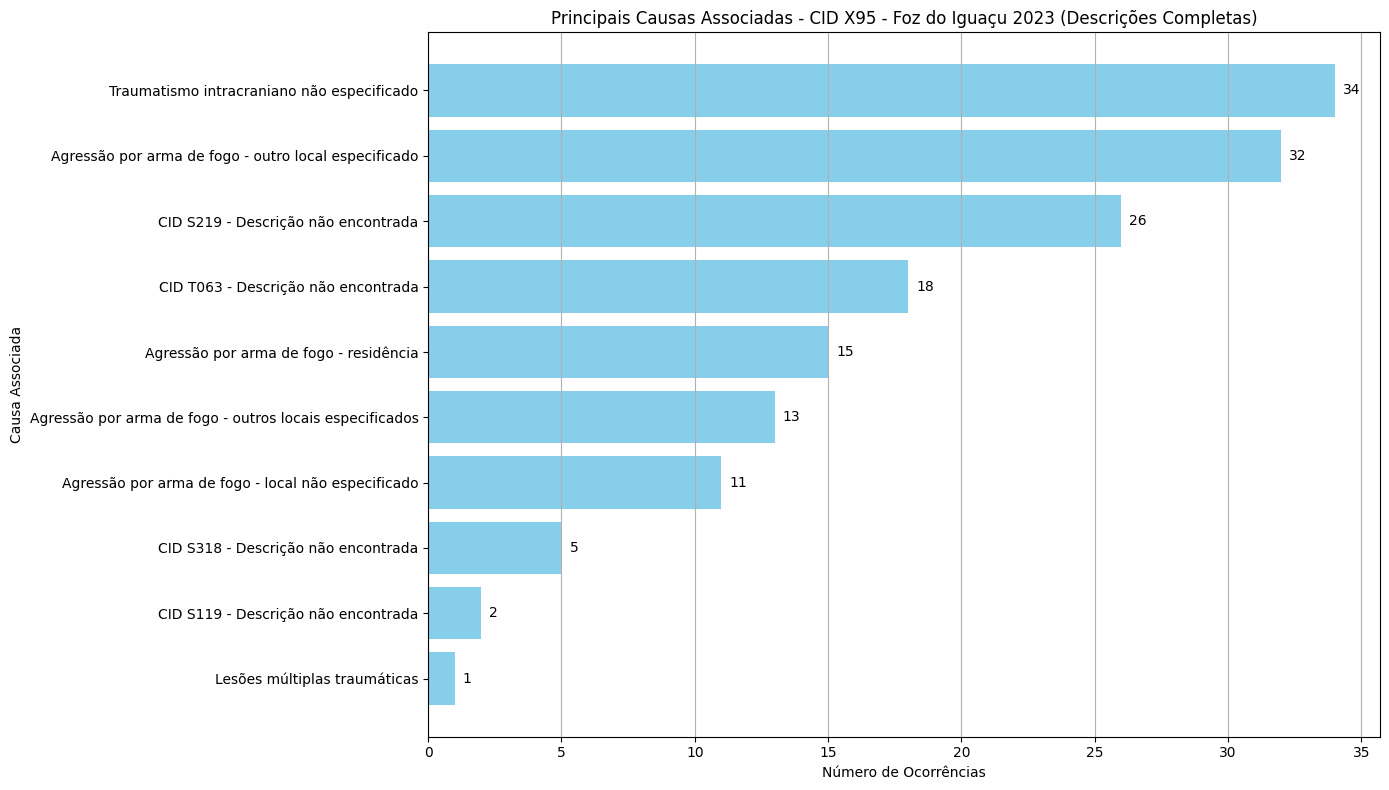

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔵 Dicionário de mapeamento atualizado
cid_map = {
    'X954': 'Agressão por arma de fogo - outro local especificado',
    'S069': 'Traumatismo intracraniano não especificado',
    'T792': 'Embolia gasosa',
    'T794': 'Sequelas de acidentes de transporte',
    'X959': 'Agressão por arma de fogo - local não especificado',
    'X950': 'Agressão por arma de fogo - residência',
    'T07X': 'Lesões múltiplas traumáticas',
    'X958': 'Agressão por arma de fogo - outros locais especificados',
    'S299': 'Outras lesões do tórax',
    'S068': 'Outras fraturas do crânio'
}

# 1. Extrair causas
linhas = pd.concat([df_x95['LINHAA'], df_x95['LINHAB'], df_x95['LINHAC'], df_x95['LINHAD']])

# 2. Limpar strings
linhas = linhas.str.replace('*', '', regex=False).str.strip()

# 3. Remover vazios e nulos
linhas = linhas.dropna()
linhas = linhas[linhas != '']

# 4. Contar causas
causas_contagem = linhas.value_counts().head(10)

# 5. Resetar índice
causas_df = causas_contagem.reset_index()
causas_df.columns = ['CID', 'Número de Ocorrências']

# 6. Limpar CIDs
causas_df['CID'] = causas_df['CID'].str.strip()

# 7. Mapear descrições
causas_df['Descrição'] = causas_df['CID'].map(cid_map)
causas_df['Descrição'] = causas_df['Descrição'].fillna('CID ' + causas_df['CID'] + ' - Descrição não encontrada')

# 8. Plotar com rótulos
plt.figure(figsize=(14,8))
bars = plt.barh(
    y=causas_df['Descrição'],
    width=causas_df['Número de Ocorrências'],
    color='skyblue'
)

plt.title('Principais Causas Associadas - CID X95 - Foz do Iguaçu 2023 (Descrições Completas)')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Causa Associada')
plt.gca().invert_yaxis()
plt.grid(axis='x')

# 🏷️ Adicionar os rótulos (agora com deslocamento menor!)
for bar in bars:
    width = bar.get_width()
    plt.text(width+.3,   # Antes era 300, agora reduzimos para 50
             bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',    # Exibe separador de milhar
             va='center')

plt.tight_layout()
plt.show()

